[Food Recalls link source-- Kaggle](https://www.kaggle.com/datasets/thedevastator/recalls-of-hazardous-foods-in-the-united-states)

My objective (out of pure curiosity... and bias :D) 
*  Find what food is the most subject to recalls in this dataset


##Columns:

*  Recalls_ID: A unique ID number assigned to each recall

*  Date_Published: The date when the recall was published

*  Recalls_Product: The product that is being recalled

*  DescriptionofProduct: A description of the product being recalled/investigated

*  Synopsis: A brief summary of why the product is being recalled etc.

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('recalls.csv') 
df

,start_date,end_date,id,title,url,reasons,status,risk_level,establishment_id,establishment_slug,establishment_name,establishment_address,establishment_telephone,establishment_grant_date,establishment_activities,quantity_recovered,quantity_unit,states
0,2010-01-09,2012-06-03,001-2010,California Firm Recalls Pork Skin Products Due...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,High,M525+P2854,rudolph-foods-company-inc,Rudolph Foods Company Inc.,"920 West 4th Street Beaumont, CA 92223",(909) 388-2202,2016-08-01,"Meat Processing, Poultry Processing",117.0,pounds,California
1,2010-01-11,2013-06-03,002-2010,Massachusetts Firm Recalls Beef Products Due t...,https://www.fsis.usda.gov/recalls-alerts/massa...,Product Contamination,Closed,High,M5497+V5497,adams-farm-slaughterhouse-llc,Adams Farm Slaughterhouse LLC,"854 Bearsden Rd Athol, MA 1331",(978) 249-9441,2022-02-17,"Meat Processing, Meat Slaughter, Voluntary Pro...",1391.0,pounds,Massachusetts
2,2010-01-15,2013-06-03,003-2010,New York Firm Recalls Beef Carcass That Contai...,https://www.fsis.usda.gov/recalls-alerts/new-y...,Product Contamination,Closed,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,pounds,New York
3,2010-01-18,2013-06-03,004-2010,California Firm Recalls Beef Products Due to P...,https://www.fsis.usda.gov/recalls-alerts/calif...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277604.0,pounds,California
4,2010-01-20,2013-06-03,005-2010,Indiana Firm Recalls Frozen Chicken Pot Pie Pr...,https://www.fsis.usda.gov/recalls-alerts/india...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,pounds,"Delaware, Florida, Illinois, Indiana, Iowa, Ke..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2022-09-23,NaN,033-2022,Empanadas Valrico Inc. Recalls Beef and Chicke...,https://www.fsis.usda.gov/recalls-alerts/empan...,Produced Without Benefit of Inspection,Active,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,2022-09-24,NaN,034-2022,Behrmann Meat and Processing Inc. Recalls Vari...,https://www.fsis.usda.gov/recalls-alerts/behrm...,Product Contamination,Active,High,M20917,behrmann-meat-processing-inc,"Behrmann Meat & Processing, Inc.","303 E. St. Rt. 161 Albers, IL 62215",(618) 248-5151,2003-04-25,"Meat Processing, Meat Slaughter",NaN,NaN,NaN
1335,2022-10-01,NaN,PHA-10012022-01,FSIS Issues Public Health Alert for Ready-To-E...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minnesota
1336,2022-10-13,NaN,PHA-10132022-01,FSIS Issues Public Health Alert for Ground Be...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['title'].to_list()

['California Firm Recalls Pork Skin Products Due to Mislabeling and an Undeclared Allergen',
 'Massachusetts Firm Recalls Beef Products Due to Possible E. coli O157:H7 Contamination',
 'New York Firm Recalls Beef Carcass That Contains Prohibited Materials',
 'California Firm Recalls Beef Products Due to Possible E. coli O157:H7 Contamination',
 'Indiana Firm Recalls Frozen Chicken Pot Pie Products That May Contain Foreign Materials',
 'Rhode Island Firm Recalls Italian Sausage Products Due To Possible Salmonella Contamination',
 'New Jersey Firm Recalls Instant Noodle Products Imported from an Unapproved Source',
 'Rhode Island Firm Recalls Italian Sausage Products Due to Possible Salmonella Contamination',
 'Missouri Firm Recalls Fresh Boneless Beef Products Due to Possible E. coli O157:H7 Contamination',
 'North Carolina Firm Recalls Pork Barbecue Products Due to an Undeclared Allergen',
 'California Firm Recalls Frozen Cured Pork Patty Mix Due to Mislabeling and an Undeclared Allerg

In [ ]:
df['title'].isnull().sum()
df = df.dropna()

In [ ]:
df["title"] = df["title"].apply(clean_special_patterns)
df

,start_date,end_date,id,title,url,reasons,status,risk_level,establishment_id,establishment_slug,establishment_name,establishment_address,establishment_telephone,establishment_grant_date,establishment_activities,quantity_recovered,quantity_unit,states
0,2010-01-09,2012-06-03,001-2010,california firm recalls pork skin products due...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,High,M525+P2854,rudolph-foods-company-inc,Rudolph Foods Company Inc.,"920 West 4th Street Beaumont, CA 92223",(909) 388-2202,2016-08-01,"Meat Processing, Poultry Processing",117.0,pounds,California
1,2010-01-11,2013-06-03,002-2010,massachusetts firm recalls beef products due t...,https://www.fsis.usda.gov/recalls-alerts/massa...,Product Contamination,Closed,High,M5497+V5497,adams-farm-slaughterhouse-llc,Adams Farm Slaughterhouse LLC,"854 Bearsden Rd Athol, MA 1331",(978) 249-9441,2022-02-17,"Meat Processing, Meat Slaughter, Voluntary Pro...",1391.0,pounds,Massachusetts
10,2010-02-10,2012-06-03,010-2010,california firm recalls frozen cured pork patt...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,Low,M21436+P21436,champ-meatball-company-inc,Champ Meatball Company Inc.,"12403 Slauson Ave. #D Whittier, CA 90606",(562) 693-7836,2015-08-17,"Meat Processing, Poultry Processing",624.0,pounds,"Arizona, California"
11,2010-02-10,2012-06-03,011-2010,new jersey firm recalls ready to eat sausage p...,https://www.fsis.usda.gov/recalls-alerts/new-j...,Product Contamination,Closed,Low,M5411+P5411,schmalz-european-provision-inc,Schmalz European Provision Inc.,"66 Fadem Road Springfield, NJ 7081",(973) 379-4662,2007-08-20,"Meat Processing, Poultry Processing",438.0,pounds,"California, Connecticut, Florida, Georgia, Ind..."
12,2010-02-12,2012-06-03,012-2010,california firm recalls frozen turkey patty pr...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Unreported Allergens, Mislabeling",Closed,Low,M2896+P2896,daniel-western-meat-packers-inc,Daniel Western Meat Packers Inc.,"5220 Van Norman Rd. Pico Rivera, CA 90660",(562) 948-4408,2007-03-26,"Meat Processing, Poultry Processing",1040.0,pounds,"California, Illinois"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,2022-05-03,2022-06-03,013-2022,safeway fresh food llc recalls ready to eat sa...,https://www.fsis.usda.gov/recalls-alerts/safew...,"Misbranding, Unreported Allergens",Closed,High,M40283+P40283+V40283,safeway-fresh-food-llc,"Safeway Fresh Food, LLC","215 N. Mill Road Vineland, NJ 8360",(856) 691-9696,2019-09-25,"Certification - Export, Meat Processing, Poult...",457.0,pounds,"Delaware, Maryland, New Jersey, New York, Penn..."
1300,2022-05-06,2022-06-22,014-2022,olympia meats recalls ready to eat pork deli m...,https://www.fsis.usda.gov/recalls-alerts/olymp...,"Misbranding, Unreported Allergens",Closed,High,M39928+P39930+V39928,olympia-meats,Olympia Meats,"123 SE 2nd Ave. Portland, OR 97214",(503) 894-8275,2017-01-11,"Meat Processing, Poultry Processing, Voluntary...",137.0,pounds,"Maine, Oregon, Washington"
1302,2022-05-07,2022-08-30,012-2022-EXP,wayne farms llc recalls ready to eat chicken b...,https://www.fsis.usda.gov/recalls-alerts/wayne...,Processing Defect,Closed,High,M21263+P20214+V21263,wayne-farms-llc-9,Wayne Farms LLC,"100 Plugs Drive Decatur, AL 35601",(256) 584-7010,2020-01-27,"Food Inspection, Identification - Meat, Identi...",53909.0,pounds,"North Carolina, South Carolina, Virginia"
1305,2022-05-18,2022-08-17,016-2022,america new york ri wang food group co ltd rec...,https://www.fsis.usda.gov/recalls-alerts/ameri...,"Mislabeling, Product Contamination",Closed,High,M40200A+P40200A+V40200A,america-new-york-ri-wang-food-group-co-ltd,"America New York Ri Wang Food Group Co., Ltd.","30 Inez Drive Bay Shore, NY 11706",(631) 231-8999,2022-02-17,"Certification - Export, Meat Processing, Poult...",8285.0,pounds of recalled products.,Nationwide


In [ ]:
count= df['title'].str.split(expand=True).stack().value_counts()

In [ ]:
count

recalls        365
to             352
products       311
due            297
and            228
              ... 
mushroom         1
operations       1
heights          1
airway           1
rachaelfood      1
Length: 622, dtype: int64

In [ ]:
count.dtype

dtype('int64')

In [ ]:
countdf = count.reset_index() 

In [ ]:
countdf

,index,0
0,recalls,365
1,to,352
2,products,311
3,due,297
4,and,228
...,...,...
617,mushroom,1
618,operations,1
619,heights,1
620,airway,1


In [ ]:
df = countdf.rename(columns={'index': 'word', 0: 'frequency'})

In [ ]:
df

,word,frequency
0,recalls,365
1,to,352
2,products,311
3,due,297
4,and,228
...,...,...
617,mushroom,1
618,operations,1
619,heights,1
620,airway,1


In [ ]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['word_nostopword'] = df['word'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df)

            word  frequency word_nostopword
0        recalls        365         recalls
1             to        352                
2       products        311        products
3            due        297             due
4            and        228                
..           ...        ...             ...
617     mushroom          1        mushroom
618   operations          1      operations
619      heights          1         heights
620       airway          1          airway
621  rachaelfood          1     rachaelfood

[622 rows x 3 columns]


In [ ]:
import numpy as np

In [ ]:
df['word_nostopword'].replace('', np.nan, inplace=True)

In [ ]:
df

,word,frequency,word_nostopword
0,recalls,365,recalls
1,to,352,NaN
2,products,311,products
3,due,297,due
4,and,228,NaN
...,...,...,...
617,mushroom,1,mushroom
618,operations,1,operations
619,heights,1,heights
620,airway,1,airway


In [ ]:
df.dropna(subset=['word_nostopword'], inplace=True)


In [ ]:
df

,word,frequency,word_nostopword
0,recalls,365,recalls
2,products,311,products
3,due,297,due
5,firm,162,firm
6,undeclared,152,undeclared
...,...,...,...
617,mushroom,1,mushroom
618,operations,1,operations
619,heights,1,heights
620,airway,1,airway


In [ ]:
df.drop(columns='word_nostopword')

,word,frequency
0,recalls,365
2,products,311
3,due,297
5,firm,162
6,undeclared,152
...,...,...
617,mushroom,1
618,operations,1
619,heights,1
620,airway,1


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sb

In [ ]:
def generateWordCloud(text: str, cmap: str):
    """
    Return a Word Cloud object generated from the corpus and color map parameter.
    """
    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = cmap, max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

    wordcloud.generate(text)

    plt.figure(figsize=(18,10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud

In [ ]:
text= df['word'].to_list()

In [ ]:
total = ' '.join(word for word in df.word)


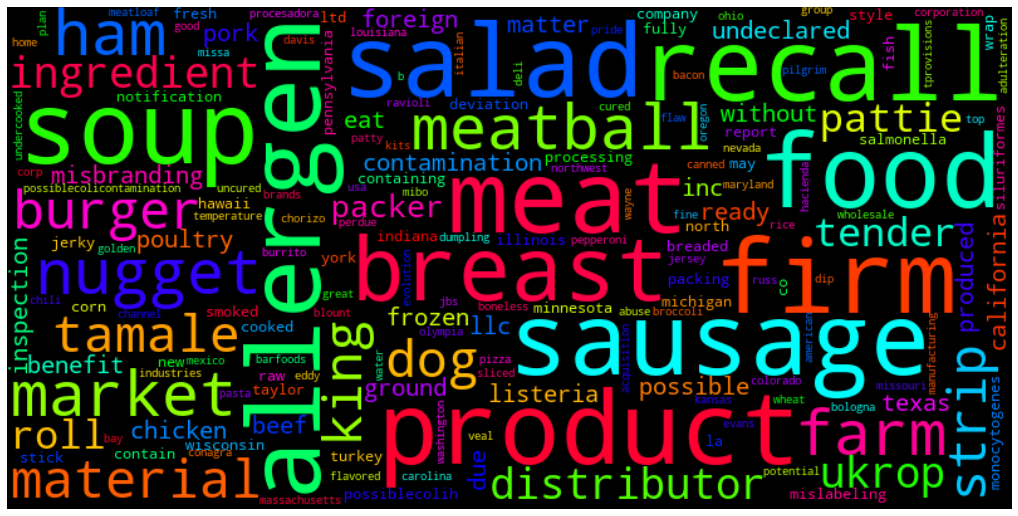

<Figure size 432x288 with 0 Axes>

In [ ]:
generateWordCloud(text = total, cmap = 'hsv').to_file('dataset_wc.png')


In [ ]:
df

,word,frequency,word_nostopword
0,recalls,365,recalls
2,products,311,products
3,due,297,due
5,firm,162,firm
6,undeclared,152,undeclared
...,...,...,...
617,mushroom,1,mushroom
618,operations,1,operations
619,heights,1,heights
620,airway,1,airway


In [ ]:
rslt_df = df[df['word'] == "sausage"]

In [ ]:
rslt_df

,word,frequency,word_nostopword
24,sausage,44,sausage


In [ ]:
rslt_df1 = df[df['word'] == "salad"]

In [ ]:
rslt_df1

,word,frequency,word_nostopword
33,salad,29,salad


In [ ]:
df1 = df[df['frequency'] > 30]

In [ ]:
df1

,word,frequency,word_nostopword
0,recalls,365,recalls
2,products,311,products
3,due,297,due
5,firm,162,firm
6,undeclared,152,undeclared
7,misbranding,146,misbranding
8,contamination,124,contamination
9,beef,110,beef
10,possible,110,possible
11,chicken,107,chicken


In [ ]:
total1 = ' '.join(word for word in df1.word)


#Results

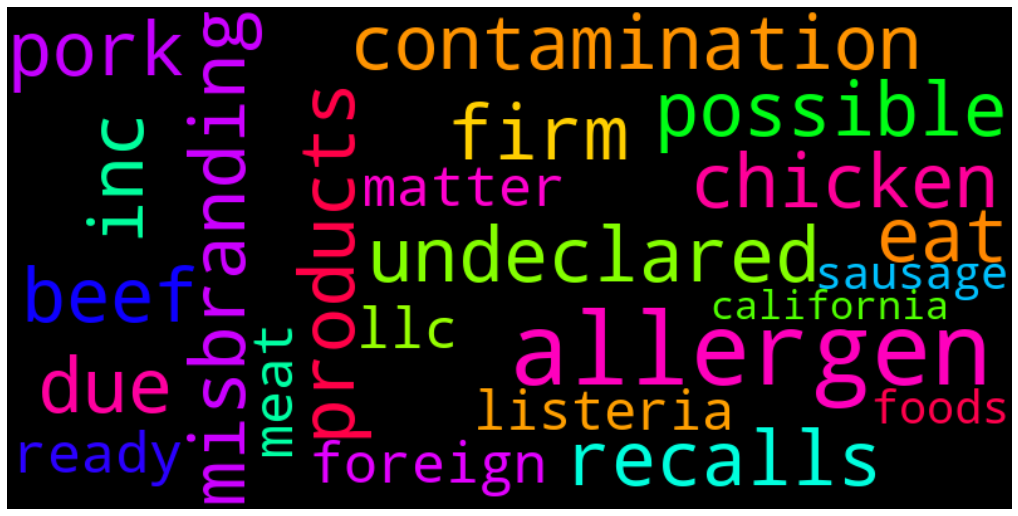

<Figure size 432x288 with 0 Axes>

In [ ]:
generateWordCloud(text = total1, cmap = 'hsv').to_file('dataset_wc.png')


In [ ]:
data = pd.read_csv('recalls.csv')

In [ ]:
data

,start_date,end_date,id,title,url,reasons,status,risk_level,establishment_id,establishment_slug,establishment_name,establishment_address,establishment_telephone,establishment_grant_date,establishment_activities,quantity_recovered,quantity_unit,states
0,2010-01-09,2012-06-03,001-2010,California Firm Recalls Pork Skin Products Due...,https://www.fsis.usda.gov/recalls-alerts/calif...,"Misbranding, Unreported Allergens",Closed,High,M525+P2854,rudolph-foods-company-inc,Rudolph Foods Company Inc.,"920 West 4th Street Beaumont, CA 92223",(909) 388-2202,2016-08-01,"Meat Processing, Poultry Processing",117.0,pounds,California
1,2010-01-11,2013-06-03,002-2010,Massachusetts Firm Recalls Beef Products Due t...,https://www.fsis.usda.gov/recalls-alerts/massa...,Product Contamination,Closed,High,M5497+V5497,adams-farm-slaughterhouse-llc,Adams Farm Slaughterhouse LLC,"854 Bearsden Rd Athol, MA 1331",(978) 249-9441,2022-02-17,"Meat Processing, Meat Slaughter, Voluntary Pro...",1391.0,pounds,Massachusetts
2,2010-01-15,2013-06-03,003-2010,New York Firm Recalls Beef Carcass That Contai...,https://www.fsis.usda.gov/recalls-alerts/new-y...,Product Contamination,Closed,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218.0,pounds,New York
3,2010-01-18,2013-06-03,004-2010,California Firm Recalls Beef Products Due to P...,https://www.fsis.usda.gov/recalls-alerts/calif...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277604.0,pounds,California
4,2010-01-20,2013-06-03,005-2010,Indiana Firm Recalls Frozen Chicken Pot Pie Pr...,https://www.fsis.usda.gov/recalls-alerts/india...,Product Contamination,Closed,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,pounds,"Delaware, Florida, Illinois, Indiana, Iowa, Ke..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2022-09-23,NaN,033-2022,Empanadas Valrico Inc. Recalls Beef and Chicke...,https://www.fsis.usda.gov/recalls-alerts/empan...,Produced Without Benefit of Inspection,Active,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,2022-09-24,NaN,034-2022,Behrmann Meat and Processing Inc. Recalls Vari...,https://www.fsis.usda.gov/recalls-alerts/behrm...,Product Contamination,Active,High,M20917,behrmann-meat-processing-inc,"Behrmann Meat & Processing, Inc.","303 E. St. Rt. 161 Albers, IL 62215",(618) 248-5151,2003-04-25,"Meat Processing, Meat Slaughter",NaN,NaN,NaN
1335,2022-10-01,NaN,PHA-10012022-01,FSIS Issues Public Health Alert for Ready-To-E...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minnesota
1336,2022-10-13,NaN,PHA-10132022-01,FSIS Issues Public Health Alert for Ground Be...,https://www.fsis.usda.gov/recalls-alerts/fsis-...,Product Contamination,Active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data[['risk_level', 'establishment_activities']]

In [ ]:
data

,risk_level,establishment_activities
0,High,"Meat Processing, Poultry Processing"
1,High,"Meat Processing, Meat Slaughter, Voluntary Pro..."
2,Low,NaN
3,High,NaN
4,High,NaN
...,...,...
1333,High,NaN
1334,High,"Meat Processing, Meat Slaughter"
1335,NaN,NaN
1336,NaN,NaN


In [ ]:
data.dropna(subset=['establishment_activities'], inplace=True)


In [ ]:
data

,risk_level,establishment_activities
0,High,"Meat Processing, Poultry Processing"
1,High,"Meat Processing, Meat Slaughter, Voluntary Pro..."
5,High,"Meat Processing, Poultry Processing"
7,High,"Meat Processing, Poultry Processing"
10,Low,"Meat Processing, Poultry Processing"
...,...,...
1329,Low,"Meat Processing, Poultry Processing"
1331,NaN,"Meat Processing, Poultry Processing"
1332,High,"Meat Processing, Poultry Processing"
1334,High,"Meat Processing, Meat Slaughter"


In [ ]:
data.establishment_activities.unique()

array(['Meat Processing, Poultry Processing',
       'Meat Processing, Meat Slaughter, Voluntary Processing - Meat, Voluntary Slaughter - Meat',
       'Meat Processing, Meat Slaughter',
       'Meat Processing, Poultry Processing, Voluntary Processing - Meat',
       'Poultry Processing, Poultry Slaughter',
       'Certification - Export, Meat Processing, Meat Slaughter, Poultry Processing, Voluntary Processing - Meat, Voluntary Slaughter - Meat',
       'Certification - Export, Meat Processing, Voluntary Processing - Meat, Voluntary Slaughter - Meat',
       'Certification - Export, Meat Processing, Poultry Processing',
       'Meat Processing, Meat Slaughter, Voluntary Processing - Exotic, Voluntary Processing - Meat, Voluntary Slaughter - Exotic, Voluntary Slaughter - Meat',
       'Meat Processing',
       'Animal Foods Inspection, Certification - Export, Meat Processing, Poultry Processing',
       'Certification - Export, Meat Processing, Voluntary Processing - Meat',
       'Me

In [ ]:
count= data['establishment_activities'].str.split(expand=True).stack().value_counts()

In [ ]:
count

Meat              799
Processing,       710
Processing        673
Poultry           649
-                 276
Voluntary         139
Slaughter          94
Certification      82
Export,            78
Meat,              64
Identification     47
Slaughter,         35
Poultry,           24
Exotic,            23
Inspection,        15
Off-Premise        12
Freezing           11
Food               10
Rabbit,             6
Foods               5
Egg                 5
Animal              5
AMS                 4
RTE                 4
Canada              4
EV                  4
Program,            4
Trichinae,          3
Slau                3
Product,            3
Volun               2
Rabbit              2
Exotic              1
Freez               1
Export              1
Products,           1
Products            1
dtype: int64